In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import sys
import matplotlib
sys.path.append('..')

from scripts.modeling.rfms_woe import *
from scripts.modeling.process import process_data
from scripts.data_utils.feature_engineering import *
from scripts.modeling.clustering import classify_users
from scripts.data_utils.loaders import load_data, save_data
from scripts.utils.visualization import plot_box, visualize_clusters
from scripts.data_utils.cleaner import convert_data_types, validate_convert_date_column

matplotlib.use('TkAgg')

In [3]:
%matplotlib inline
RESOURCEPATH = os.path.join('..', 'resources')
DATAPATH = os.path.join(RESOURCEPATH, 'data')

preprocessed_output_dir = os.path.join(DATAPATH, 'preprocessed')
plot_output_dir = os.path.join('..', 'screenshots', 'plots')
feature_output_dir = os.path.join(DATAPATH, 'features')
processed_output_path = os.path.join(DATAPATH, "processed")

os.makedirs(plot_output_dir, exist_ok=True)
os.makedirs(feature_output_dir, exist_ok=True)
os.makedirs(processed_output_path, exist_ok=True)

In [4]:
file_path = os.path.join(preprocessed_output_dir, "data_preprocessed.csv")
date_column = "TransactionStartTime"
dtype_conversions = {"CountryCode": "int64", "CountryCode": "str"}

data = load_data(file_path)
data = validate_convert_date_column(data, date_column)
data = convert_data_types(data, dtype_conversions)
data.info()

2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:00 - INFO - Loading data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:01 - INFO - Successfully loaded data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:01 - INFO - Successfully loaded data from ..\resources\data\preprocessed\data_preprocessed.csv
2025-01-30 02:21:01 - INFO - Successfully loaded data from ..\resources\data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95661 entries, 0 to 95660
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype                             
---  ------                --------------  -----                             
 0   TransactionId         95661 non-null  object                            
 1   BatchId               95661 non-null  object                            
 2   AccountId             95661 non-null  object                            
 3   SubscriptionId        95661 non-null  object                            
 4   CustomerId            95661 non-null  object                            
 5   CurrencyCode          95661 non-null  object                            
 6   CountryCode           95661 non-null  object                            
 7   ProviderId            95661 non-null  object                            
 8   ProductId             95661 non-null  object                            
 9   ProductCategory       95661 

In [5]:
# Define the target feature and feature lists
drop_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId']
numerical_columns = ['Amount', 'Value', 'PricingStrategy']
temporal_features = ['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']
categorical_columns = ["CurrencyCode", "CountryCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"]
aggregated_features = ['total_transaction_amount', 'avg_transaction_amount', 'transaction_count', 'std_transaction_amount']
numerical_features = numerical_columns + aggregated_features
columns = categorical_columns + numerical_features

rfms_features = ['Recency', 'Frequency', 'Monetary', 'Severity']
score_column = rfms_features[2]
cluster_column = rfms_features[0]
date_column = 'TransactionStartTime'
target_column = 'FraudResult'
customer_column = "CustomerId"
label_column = "RFMS_Label"
recency_column = date_column
frequency_column = 'TransactionId'
monetary_column = "Amount"
severity_column = "Value"

# data_processed = process_data(data, numerical_features, date_column, customer_column, recency_column, frequency_column, monetary_column, 
#              severity_column, target_column, label_column, columns, rfms_features, processed_output_path)


In [6]:
aggregated_columns_path = os.path.join(feature_output_dir, "aggregate_columns.csv")
temporal_columns_path = os.path.join(feature_output_dir, "temporal_columns.csv")
encoded_columns_path = os.path.join(feature_output_dir, "encoded_columns.csv")
missing_handled_path = os.path.join(feature_output_dir, "missing_handled.csv")
normalized_columns_path = os.path.join(feature_output_dir, "normalized_columns.csv")

In [7]:
# Aggregate Features
data_aggregated = create_aggregate_features(data, output_path=aggregated_columns_path)
data_aggregated

2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Creating aggregate features.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features created successfully.
2025-01-30 02:21:05 - INFO - Aggregate features saved to ..\resources\data\features\aggregate_columns.cs

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,CHANNELID_3,1000.0,1000.00000,2018-11-15 05:18:49+03:00,2.0,0,113620.75,954.796218,119,3051.453456
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,3679.0,20.00000,2018-11-15 05:19:08+03:00,2.0,0,113620.75,954.796218,119,3051.453456
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,PROVIDERID_4,ProductId_1,AIRTIME,CHANNELID_3,500.0,500.00000,2018-11-15 05:44:21+03:00,2.0,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,PROVIDERID_1,ProductId_21,UTILITY_BILL,CHANNELID_3,20000.0,9900.64041,2018-11-15 06:32:55+03:00,2.0,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-644.0,644.00000,2018-11-15 06:34:21+03:00,2.0,0,228727.20,6019.136842,38,17169.241610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-1000.0,1000.00000,2019-02-13 12:54:09+03:00,2.0,0,2438140.00,4255.043630,573,22554.029939
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,CHANNELID_3,1000.0,1000.00000,2019-02-13 12:54:25+03:00,2.0,0,58499.60,1360.455814,43,2274.756582
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-20.0,20.00000,2019-02-13 12:54:35+03:00,2.0,0,58499.60,1360.455814,43,2274.756582
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,PROVIDERID_6,ProductId_19,TV,CHANNELID_3,3000.0,3000.00000,2019-02-13 13:01:10+03:00,2.0,0,851985.00,1625.925573,524,3207.920536


In [8]:
# Temporal Features
data_temporal = extract_temporal_features(data_aggregated, date_column, output_path=temporal_columns_path)
data_temporal

2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Extracting datetime features.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:05 - INFO - Temporal features extracted.
2025-01-30 02:21:10 - INFO - Datetime features saved to ..\resources\data\features\temporal_columns.csv
2025-01-30 02:21:10 - INFO - Datetime features saved to ..\resources\data\fea

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,...,2.0,0,113620.75,954.796218,119,3051.453456,5,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,2.0,0,113620.75,954.796218,119,3051.453456,5,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,PROVIDERID_4,ProductId_1,AIRTIME,...,2.0,0,1000.00,500.000000,2,0.000000,5,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,PROVIDERID_1,ProductId_21,UTILITY_BILL,...,2.0,0,228727.20,6019.136842,38,17169.241610,6,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,2.0,0,228727.20,6019.136842,38,17169.241610,6,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,2.0,0,2438140.00,4255.043630,573,22554.029939,12,13,2,2019
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,...,2.0,0,58499.60,1360.455814,43,2274.756582,12,13,2,2019
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,2.0,0,58499.60,1360.455814,43,2274.756582,12,13,2,2019
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,PROVIDERID_6,ProductId_19,TV,...,2.0,0,851985.00,1625.925573,524,3207.920536,13,13,2,2019


In [9]:
# Specify features for one-hot and label encoding
one_hot_columns = ["ProductCategory", "ChannelId"]
label_columns = ["CurrencyCode", "CountryCode", "ProviderId"]

# Encode Categorical Variables
data_encoded, encoder_map = encode_categorical_variables(data_temporal, one_hot_columns, label_columns, output_path=encoded_columns_path)
data_encoded

2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:10 - INFO - Performing One-Hot Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:11 - INFO - Performing Label Encoding.
2025-01-30 02:21:16 - INFO - Encoded features saved to ..\resources\data\features\encoded_columns.csv
2025-01-30 02:21:16 - INFO - Encoded features saved to ..\resources\data\features\encoded_columns.cs

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,Amount,...,ProductCategory_MOVIES,ProductCategory_OTHER,ProductCategory_TICKET,ProductCategory_TRANSPORT,ProductCategory_TV,ProductCategory_UTILITY_BILL,ChannelId_CHANNELID_1,ChannelId_CHANNELID_2,ChannelId_CHANNELID_3,ChannelId_CHANNELID_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,0,5,ProductId_10,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,0,3,ProductId_6,3679.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,0,3,ProductId_1,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,0,ProductId_21,20000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,0,3,ProductId_6,-644.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0,0,3,ProductId_6,-1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0,0,5,ProductId_10,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0,0,3,ProductId_6,-20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0,0,5,ProductId_19,3000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
encoder_map

{'CurrencyCode': ['UGX'],
 'CountryCode': ['256.0'],
 'ProviderId': ['PROVIDERID_1',
  'PROVIDERID_2',
  'PROVIDERID_3',
  'PROVIDERID_4',
  'PROVIDERID_5',
  'PROVIDERID_6']}

In [11]:
# Normalize Numerical Features
data_scaled, scaler = normalize_standardize_numerical_features(data_temporal, numerical_features, mode='standard', output_path=normalized_columns_path) # mode="normalize"
data_scaled

2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:17 - INFO - Numerical features scaled using standard mode.
2025-01-30 02:21:17 - INFO - Numerical features scaled using standard mode.
2025-01-30 02:21:17 - INFO - Numerical features scaled using standard mode.
2025-01-30 02:21:17 - INFO - Numerical features scaled using standard mode.
2025-01-30 02:21:17 - INFO - Numerical features scaled using standard mode.
2025-01-30 02:21:17 - INFO - Numerical features scaled using standa

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,...,-0.349181,0,0.170287,-0.067264,-0.311832,-0.166915,5,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.170287,-0.067264,-0.311832,-0.166915,5,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,PROVIDERID_4,ProductId_1,AIRTIME,...,-0.349181,0,0.165122,-0.072572,-0.444994,-0.201210,5,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,PROVIDERID_1,ProductId_21,UTILITY_BILL,...,-0.349181,0,0.175567,-0.008159,-0.404021,-0.008246,6,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.175567,-0.008159,-0.404021,-0.008246,6,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.276903,-0.028747,0.204881,0.052274,12,13,2,2019
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,...,-0.349181,0,0.167759,-0.062529,-0.398330,-0.175644,12,13,2,2019
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.167759,-0.062529,-0.398330,-0.175644,12,13,2,2019
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,PROVIDERID_6,ProductId_19,TV,...,-0.349181,0,0.204153,-0.059431,0.149113,-0.165157,13,13,2,2019


# RFMS WOE Binning

In [12]:
data = data_scaled.copy()
# rfms_classified, woe_encoded = woe_rfms_pipeline(data, customer_column, recency_column, frequency_column, monetary_column, 
#                                                  severity_column, target_column, label_column, columns, rfms_features, scaler, processed_output_path)
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,...,-0.349181,0,0.170287,-0.067264,-0.311832,-0.166915,5,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.170287,-0.067264,-0.311832,-0.166915,5,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,PROVIDERID_4,ProductId_1,AIRTIME,...,-0.349181,0,0.165122,-0.072572,-0.444994,-0.201210,5,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,PROVIDERID_1,ProductId_21,UTILITY_BILL,...,-0.349181,0,0.175567,-0.008159,-0.404021,-0.008246,6,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.175567,-0.008159,-0.404021,-0.008246,6,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.276903,-0.028747,0.204881,0.052274,12,13,2,2019
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,PROVIDERID_6,ProductId_10,AIRTIME,...,-0.349181,0,0.167759,-0.062529,-0.398330,-0.175644,12,13,2,2019
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256.0,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,...,-0.349181,0,0.167759,-0.062529,-0.398330,-0.175644,12,13,2,2019
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256.0,PROVIDERID_6,ProductId_19,TV,...,-0.349181,0,0.204153,-0.059431,0.149113,-0.165157,13,13,2,2019


In [13]:
# Calculate the default rate
default_rate = calculate_default_rate(data, target=target_column)
f"{default_rate*100:.2f}%"

2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-30 02:21:22 - INFO - Default rate for target (FraudResult): 0.20%


'0.20%'

2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.
2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.
2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.
2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.
2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.
2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.
2025-01-30 02:21:22 - INFO - Calculating RFMS scores with recency.


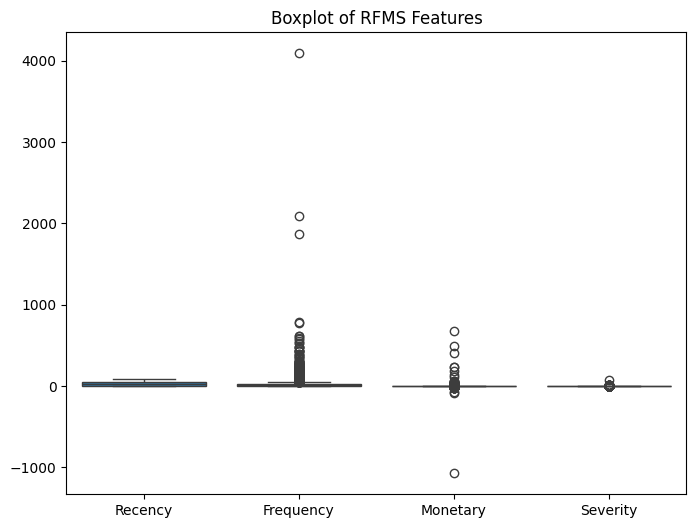

In [14]:
# Calculate RFMS scores
rfms = calculate_rfms(data, customer_column, recency_column, frequency_column, monetary_column, severity_column)
plot_box(rfms, rfms_features)

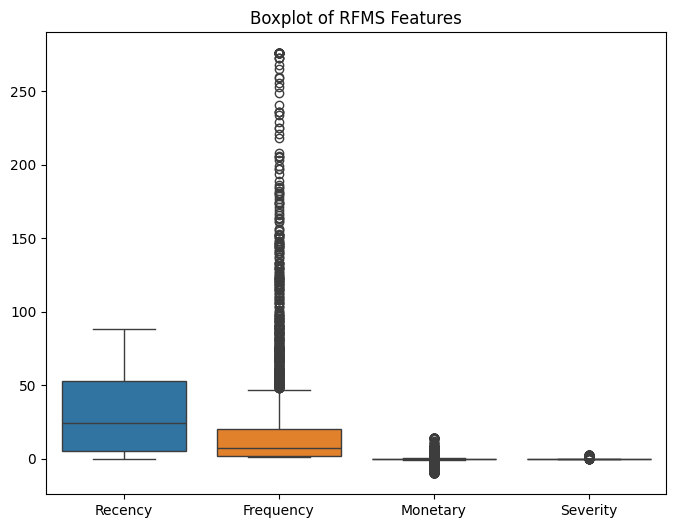

In [15]:
rfms_outliers = handle_outliers(rfms, rfms_features)
plot_box(rfms_outliers, rfms_features)

2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Normalizing RFMS values.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Scaling numerical features using standard method.
2025-01-30 02:21:24 - INFO - Numerical features scaled using standard

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Severity'], dtype='object') ['Frequency', 'Monetary', 'Recency', 'Severity']


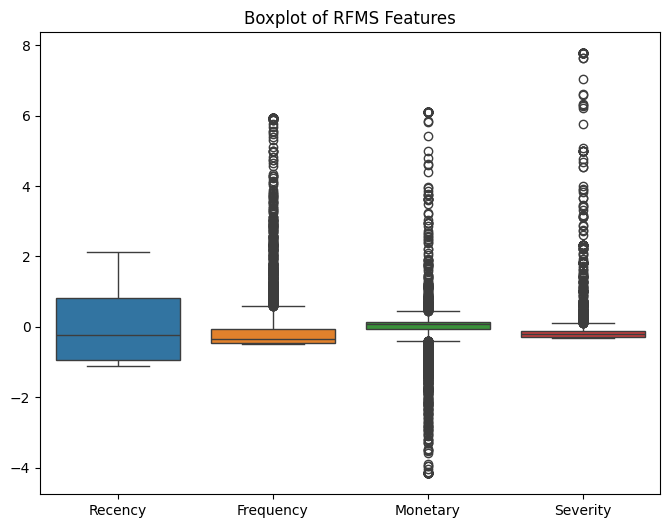

In [16]:
rfms_normalized, scaler = normalize_rfms(rfms_outliers, customer_column, scaler=scaler)
plot_box(rfms_normalized, rfms_features)

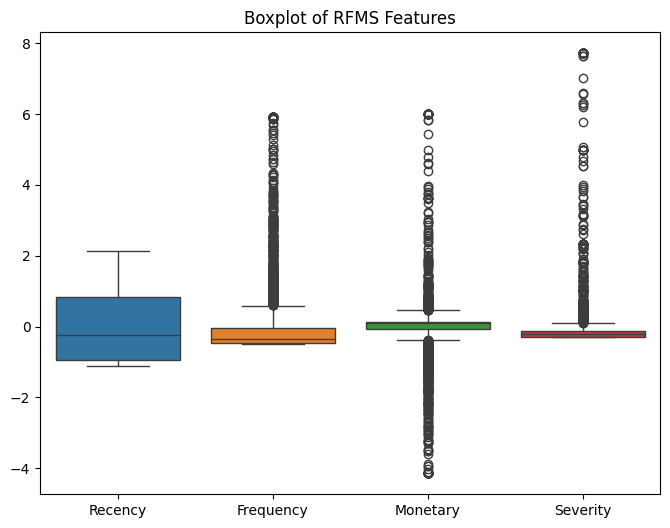

In [17]:
rfms_normalized_outlier = handle_outliers(rfms_normalized, rfms_features)
plot_box(rfms_normalized_outlier, rfms_features)

In [18]:
# merging 
data_processed = data.merge(rfms_normalized_outlier, on=customer_column, how='left')

Woe Binning

In [19]:
# encoding with woe binning
data_woe_encoded = woe_binning(data_processed, target_column, columns, max_bins=5, output_dir=processed_output_path)
data_woe_encoded

2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - Applying WoE binning.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:25 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-30 02:21:26 - INFO 

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year,Recency,Frequency,Monetary,Severity
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5.170753e-12,5.170753e-12,3.136986,1.645077,1.620390,...,0.0,0.0,5,15,11,2018,-1.123941,2.265334,-2.245134,-0.270937
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,0.0,0.0,5,15,11,2018,-1.123941,2.265334,-2.245134,-0.270937
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5.170753e-12,5.170753e-12,2.736904,17.224000,1.620390,...,0.0,0.0,5,15,11,2018,1.865771,-0.471068,0.115318,-0.303111
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,5.170753e-12,5.170753e-12,-1.618889,-0.271611,-1.134952,...,0.0,0.0,6,15,11,2018,-0.939391,0.370902,0.065797,-0.124615
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,0.0,0.0,6,15,11,2018,-0.939391,0.370902,0.065797,-0.124615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,0.0,0.0,12,13,2,2019,-1.123941,5.907801,-4.144466,-0.198739
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5.170753e-12,5.170753e-12,3.136986,1.645077,1.620390,...,0.0,0.0,12,13,2,2019,-1.123941,0.487842,-0.648635,-0.277440
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,0.0,0.0,12,13,2,2019,-1.123941,0.487842,-0.648635,-0.277440
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5.170753e-12,5.170753e-12,3.136986,16.128848,16.410553,...,0.0,0.0,13,13,2,2019,-1.123941,5.907801,-4.144466,-0.265812


2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Classifying customers.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 02:21:29 - INFO - Clustering customers using kmeans method.
2025-01-30 03:40:38 - INFO - Optimal k determined: 3 with silhouette score: 0.6335566377522186
2025-01-30 03:40:38 - INFO - Optimal k deter

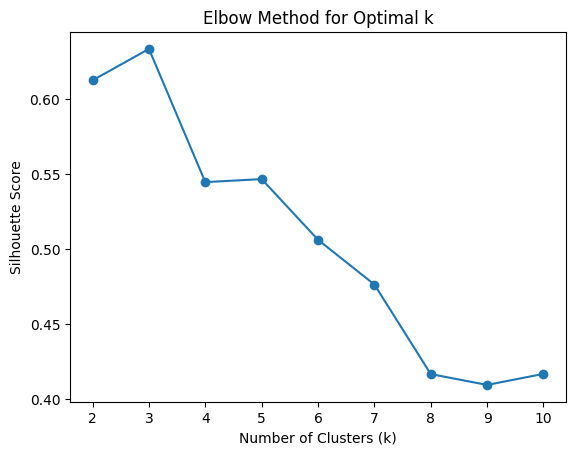

2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Started clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Finished clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Finished clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Finished clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Finished clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Finished clustering RFMS data into 3 clusters.
2025-01-30 03:40:39 - INFO - Finished clustering RFMS data into 3 clusters.
2025-01-30 03:40:39

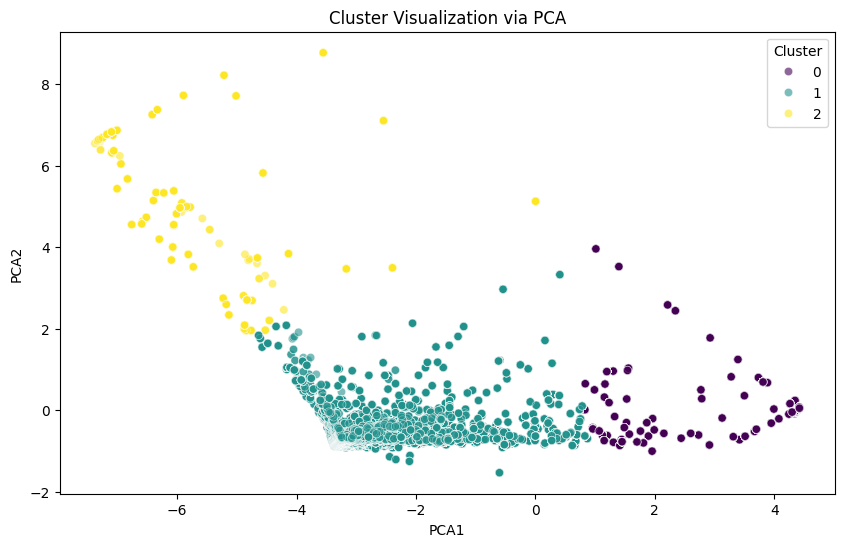

2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:46 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:47 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:47 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:47 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:47 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:47 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-30 03:40:47 - INFO - Customer labels assigned to column: RFMS_Label.

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,transaction_hour,transaction_day,transaction_month,transaction_year,Recency,Frequency,Monetary,Severity,Cluster,RFMS_Label
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5.170753e-12,5.170753e-12,3.136986,1.645077,1.620390,...,5,15,11,2018,-1.123941,2.265334,-2.245134,-0.270937,1,Bad
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,5,15,11,2018,-1.123941,2.265334,-2.245134,-0.270937,1,Bad
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5.170753e-12,5.170753e-12,2.736904,17.224000,1.620390,...,5,15,11,2018,1.865771,-0.471068,0.115318,-0.303111,1,Bad
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,5.170753e-12,5.170753e-12,-1.618889,-0.271611,-1.134952,...,6,15,11,2018,-0.939391,0.370902,0.065797,-0.124615,1,Bad
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,6,15,11,2018,-0.939391,0.370902,0.065797,-0.124615,1,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,12,13,2,2019,-1.123941,5.907801,-4.144466,-0.198739,0,Bad
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5.170753e-12,5.170753e-12,3.136986,1.645077,1.620390,...,12,13,2,2019,-1.123941,0.487842,-0.648635,-0.277440,1,Bad
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,5.170753e-12,5.170753e-12,2.736904,4.189223,-0.565457,...,12,13,2,2019,-1.123941,0.487842,-0.648635,-0.277440,1,Bad
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5.170753e-12,5.170753e-12,3.136986,16.128848,16.410553,...,13,13,2,2019,-1.123941,5.907801,-4.144466,-0.265812,0,Bad


In [20]:
# User Classification
rfms_classified = classify_users(data_woe_encoded, rfms_features, score_column=score_column, label_column=label_column)
rfms_classified

2025-01-30 03:40:47 - INFO - Generating cluster visualization.
2025-01-30 03:40:47 - INFO - Generating cluster visualization.
2025-01-30 03:40:47 - INFO - Generating cluster visualization.
2025-01-30 03:40:47 - INFO - Generating cluster visualization.
2025-01-30 03:40:47 - INFO - Generating cluster visualization.
2025-01-30 03:40:47 - INFO - Generating cluster visualization.
2025-01-30 03:40:47 - INFO - Generating cluster visualization.
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-6\notebooks\..\scripts\utils\visualization.py:138: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(output_path)
2025-01-30 04:48:23 - INFO - Cluster visualization saved to ..\screenshots\plots\clusters.png.
2025-01-30 04:48:23 - INFO - Cluster visualization saved to ..\screenshots\plots\clusters.png.
2025-01-30 04:48:23 - INFO - Cluster visualization saved to ..\screenshots\plots\clusters.png.
2025-01-30 04:48:23 - INFO - Cluster visualization saved to ..

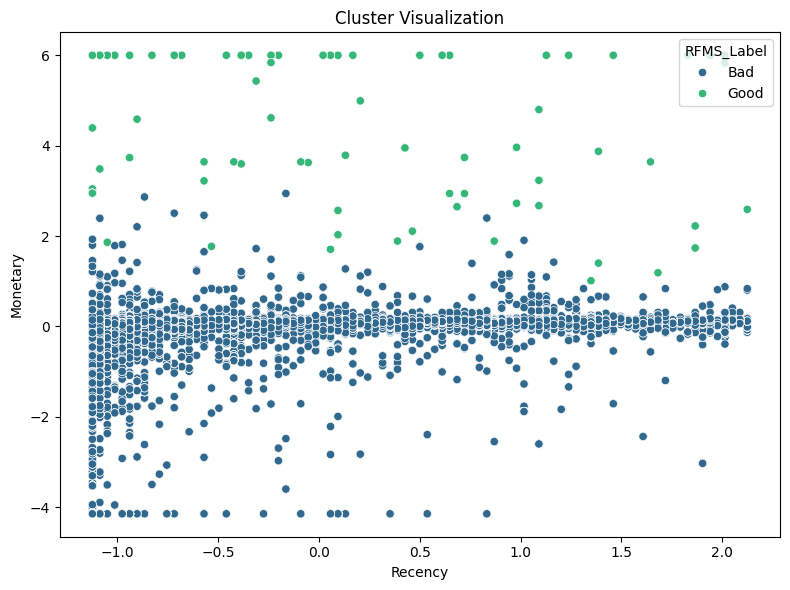

In [21]:
visualize_clusters(rfms_classified, cluster_column, score_column, label_column, output_dir=plot_output_dir)

In [22]:
# Save the final transformed dataset
save_data(rfms_classified, os.path.join(processed_output_path, 'data_rfms_classified.csv'))

2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv
2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv
2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv
2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv
2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv
2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv
2025-01-30 04:49:04 - INFO - Data saved to ..\resources\data\processed\data_rfms_classified.csv


In [23]:
# Apply WoE Encoding for Categorical Features
# data_xverse = woe_encode(data_preprocessed, target="FraudResult", categorical_columns=categorical_columns)
# data_xverse